In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
year_df = pd.read_csv('Clustersv1.csv')

In [44]:
print(year_df)

       NoradId  Month01  Month02  Month03  Month04  Month05  Month06  Month07  \
0            5      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1           11      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2           12      0.0      0.0      3.0      0.0      0.0      0.0      0.0   
3           16      0.0      0.0      0.0      0.0      0.0      3.0      0.0   
4           20      0.0      3.0      0.0      0.0      3.0      0.0      0.0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
20657    44806      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
20658    44813      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
20659    44819      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
20660    44820      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
20661    82529      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

       Month08  Month09  Mo

In [34]:
cluster_count = pd.DataFrame()

# iterate through months 1-12
for j in range(1, 13):
    month_list = []
    # iterate through cluster number 0-7 within each month
    for i in range(0, 8):
        month_list.append((year_df['Month0{}'.format(j)] == i).sum())
    month_df = pd.DataFrame(month_list, columns=['Month0{}'.format(j)])
    cluster_count = pd.concat([cluster_count, month_df], axis=1)
cluster_count['Cluster Number'] = [0, 1, 2, 3, 4, 5, 6, 7]
cluster_count.set_index('Cluster Number', inplace=True)
print(cluster_count)

                Month01  Month02  Month03  Month04  Month05  Month06  Month07  \
Cluster Number                                                                  
0                  1606     1710     1707     1733     1718     1714     1725   
1                  2628     2437     2534     2443     2260     2220     2368   
2                  3380     3487     2817     2437     2070     1937     2022   
3                  2152     2157     2337     2818     3837     4072     3301   
4                  1984     1968     1984     2005     2002     1986     1980   
5                  3018     2686     2395     2187     2270     2068     1887   
6                  2458     2285     2159     2184     2405     2895     3918   
7                  2138     2674     3644     3664     2908     2662     2321   

                Month08  Month09  Month010  Month011  Month012  
Cluster Number                                                  
0                  1746     1729      1721      1780      1

<AxesSubplot:title={'center':'Number of ASOs in Each Cluster Over 1 Year'}>

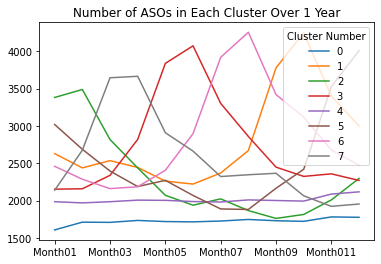

In [39]:
transposed = cluster_count.transpose()
transposed.plot.line(title="Number of ASOs in Each Cluster Over 1 Year")

In [34]:
# count how many clusters each object belongs to over the year
membership = pd.DataFrame(columns = ['NoradId', 'NumClusters'])

for index, row in year_df.iterrows():
    row_array = row[1:].to_numpy()
    count = len(np.unique(row_array[~np.isnan(row_array)]))
    new_row = {'NoradId':row[0], 'NumClusters':count}
    membership = membership.append(new_row, ignore_index=True)

print(membership)

       NoradId  NumClusters
0          5.0          2.0
1         11.0          2.0
2         12.0          2.0
3         16.0          2.0
4         20.0          2.0
...        ...          ...
20657  44806.0          1.0
20658  44813.0          1.0
20659  44819.0          1.0
20660  44820.0          1.0
20661  82529.0          1.0

[20662 rows x 2 columns]


Text(0.5, 1.0, 'How Many Clusters the Objects Are In Over the Year')

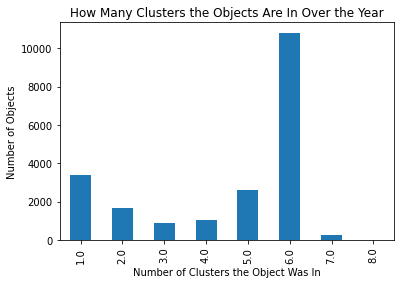

In [42]:
# graph showing number of objects that belong to each number of clusters over the year
membership['NumClusters'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of Clusters the Object Was In')
plt.ylabel('Number of Objects')
plt.title('How Many Clusters the Objects Are In Over the Year')

In [49]:
# look at clusters based on magnitude of angular momentum
mag_year_df = pd.read_csv('MagClustersv1.csv')

mag_cluster_count = pd.DataFrame()

# iterate through months 1-12
for j in range(1, 13):
    month_list = []
    # iterate through cluster number 0-7 within each month
    for i in range(0, 3):
        month_list.append((mag_year_df['Month0{}'.format(j)] == i).sum())
    month_df = pd.DataFrame(month_list, columns=['Month0{}'.format(j)])
    mag_cluster_count = pd.concat([mag_cluster_count, month_df], axis=1)
mag_cluster_count['Cluster Number'] = [0, 1, 2]
mag_cluster_count.set_index('Cluster Number', inplace=True)
print(mag_cluster_count)

                Month01  Month02  Month03  Month04  Month05  Month06  Month07  \
Cluster Number                                                                  
0                 16536    16516    16674    16554    16540    16625    16601   
1                  1988     1976     1981     2005     1999     1983     1974   
2                   840      912      922      912      931      946      947   

                Month08  Month09  Month010  Month011  Month012  
Cluster Number                                                  
0                 16663    16712     16768     16673     16773  
1                  2003     2001      1988      2082      2108  
2                   959      948       937      1001      1006  


<AxesSubplot:title={'center':'Number of ASOs in Each Mag Cluster Over 1 Year'}>

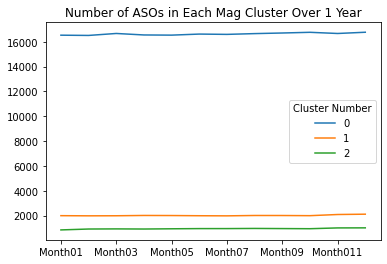

In [50]:
transposed = mag_cluster_count.transpose()
transposed.plot.line(title="Number of ASOs in Each Mag Cluster Over 1 Year")

In [51]:
# count how many mag clusters each object belongs to over the year
mag_membership = pd.DataFrame(columns = ['NoradId', 'NumClusters'])

for index, row in mag_year_df.iterrows():
    row_array = row[1:].to_numpy()
    count = len(np.unique(row_array[~np.isnan(row_array)]))
    new_row = {'NoradId':row[0], 'NumClusters':count}
    mag_membership = mag_membership.append(new_row, ignore_index=True)

print(mag_membership)

       NoradId  NumClusters
0          5.0          1.0
1         11.0          1.0
2         12.0          1.0
3         16.0          1.0
4         20.0          1.0
...        ...          ...
20657  44806.0          1.0
20658  44813.0          1.0
20659  44819.0          1.0
20660  44820.0          1.0
20661  82529.0          1.0

[20662 rows x 2 columns]


Text(0.5, 1.0, 'How Many Mag Clusters the Objects Are In Over the Year')

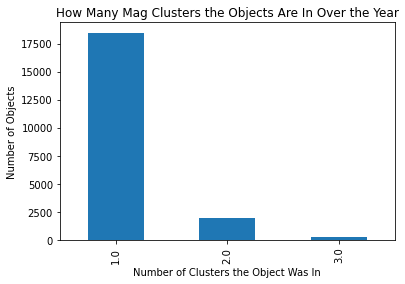

In [52]:
# graph showing number of objects that belong to each number of clusters over the year
mag_membership['NumClusters'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of Clusters the Object Was In')
plt.ylabel('Number of Objects')
plt.title('How Many Mag Clusters the Objects Are In Over the Year')